# 데이터 불러오기

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df_monthly = pd.read_csv('관악02_2018~2023_data(2).csv')

In [60]:
df_monthly

,사용년월,노선번호,노선명,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
0,201801,관악02,관악02(낙성대역~서울대신공학관),가족생활동,0,0,80,4,182,12,...,361,60,226,41,249,35,148,36,92,14
1,201801,관악02,관악02(낙성대역~서울대신공학관),BK국제관,0,0,72,8,226,14,...,268,56,131,59,137,58,82,33,67,27
2,201801,관악02,관악02(낙성대역~서울대신공학관),기숙사구관,0,0,209,34,627,30,...,779,166,584,135,490,142,521,166,350,129
3,201801,관악02,관악02(낙성대역~서울대신공학관),인헌아파트,49,2,30,18,0,0,...,37,294,41,255,11,162,18,155,11,95
4,201801,관악02,관악02(낙성대역~서울대신공학관),서울과학전시관,0,0,184,2,394,6,...,437,39,332,60,228,24,68,22,47,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,202307,관악02,관악02(낙성대역~서울대신공학관),낙성대입구(00002),0,0,343,78,225,20,...,501,122,489,81,590,60,562,45,613,19
2907,202307,관악02,관악02(낙성대역~서울대신공학관),인헌초등학교(00003),0,0,25,32,117,61,...,180,163,226,56,209,66,139,63,113,49
2908,202307,관악02,관악02(낙성대역~서울대신공학관),호암교수회관(00032),0,0,1,14,5,11,...,6,118,3,77,4,119,0,140,1,35
2909,202307,관악02,관악02(낙성대역~서울대신공학관),호암교수회관(00007),0,0,98,844,322,1253,...,7,568,1,548,0,402,1,409,1,251


In [61]:
df_daily = pd.read_csv('DATA_daily_2017_2023.csv')

In [62]:
df_daily

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20170101.0,관악02,관악02(낙성대역~서울대신공학관),21785,낙성대역,1463.0,37.0,20170109.0
1,20170101.0,관악02,관악02(낙성대역~서울대신공학관),21800,낙성대입구,138.0,30.0,20170109.0
2,20170101.0,관악02,관악02(낙성대역~서울대신공학관),21819,인헌초등학교,69.0,25.0,20170109.0
3,20170101.0,관악02,관악02(낙성대역~서울대신공학관),21844,낙성대현대아파트,12.0,12.0,20170109.0
4,20170101.0,관악02,관악02(낙성대역~서울대신공학관),21858,낙성대공원.영어마을,6.0,12.0,20170109.0
...,...,...,...,...,...,...,...,...
95237,20230731.0,관악02,관악02(낙성대역~서울대신공학관),21800,낙성대입구(00002),242.0,38.0,20230803.0
95238,20230731.0,관악02,관악02(낙성대역~서울대신공학관),21819,인헌초등학교(00003),91.0,58.0,20230803.0
95239,20230731.0,관악02,관악02(낙성대역~서울대신공학관),21870,호암교수회관(00007),183.0,548.0,20230803.0
95240,20230731.0,관악02,관악02(낙성대역~서울대신공학관),21870,호암교수회관(00032),0.0,39.0,20230803.0


# 1. 전체기간

## (1) 정류장별 하루평균 승하차인원

In [63]:
# '역명'을 기준으로 그룹화하여 각 역별로 승차총승객수와 하차총승객수의 합을 계산
station_grouped = df_daily.groupby('역명',as_index=False).agg({
    '승차총승객수': 'sum',
    '하차총승객수': 'sum'
})

# 각 역별로 하루 평균 승차 인원과 하차 인원을 계산하여 새로운 열에 추가
num_days = len(df_daily['사용일자'].unique())  
station_grouped['하루평균_승차인원'] = station_grouped['승차총승객수'] / num_days
station_grouped['하루평균_하차인원'] = station_grouped['하차총승객수'] / num_days

In [64]:
# 사용된 고유한 사용일자 수를 계산
num_days = len(df_daily['사용일자'].unique())  
num_days

2452

In [116]:
# print(station_grouped[['하루평균_승차인원', '하루평균_하차인원']])

In [66]:
station_grouped

,역명,승차총승객수,하차총승객수,하루평균_승차인원,하루평균_하차인원
0,BK국제관,553721.0,52675.0,225.824225,21.482463
1,BK국제관(00028),50725.0,5332.0,20.687194,2.174551
2,BK국제관(00030),132021.0,16485.0,53.842170,6.723083
3,가족생활동,350875.0,294153.0,143.097471,119.964519
4,가족생활동(00010),13746.0,69170.0,5.606036,28.209625
...,...,...,...,...,...
89,학부생활관(00029),149919.0,14693.0,61.141517,5.992251
90,호암교수회관,278112.0,1035699.0,113.422512,422.389478
91,호암교수회관(00007),84660.0,216007.0,34.526917,88.094209
92,호암교수회관(00030),636.0,4212.0,0.259380,1.717781


In [67]:
# CSV 파일로 저장
output_file_path = 'dailyavg.csv'
station_grouped.to_csv(output_file_path, index=False, encoding="utf-8")

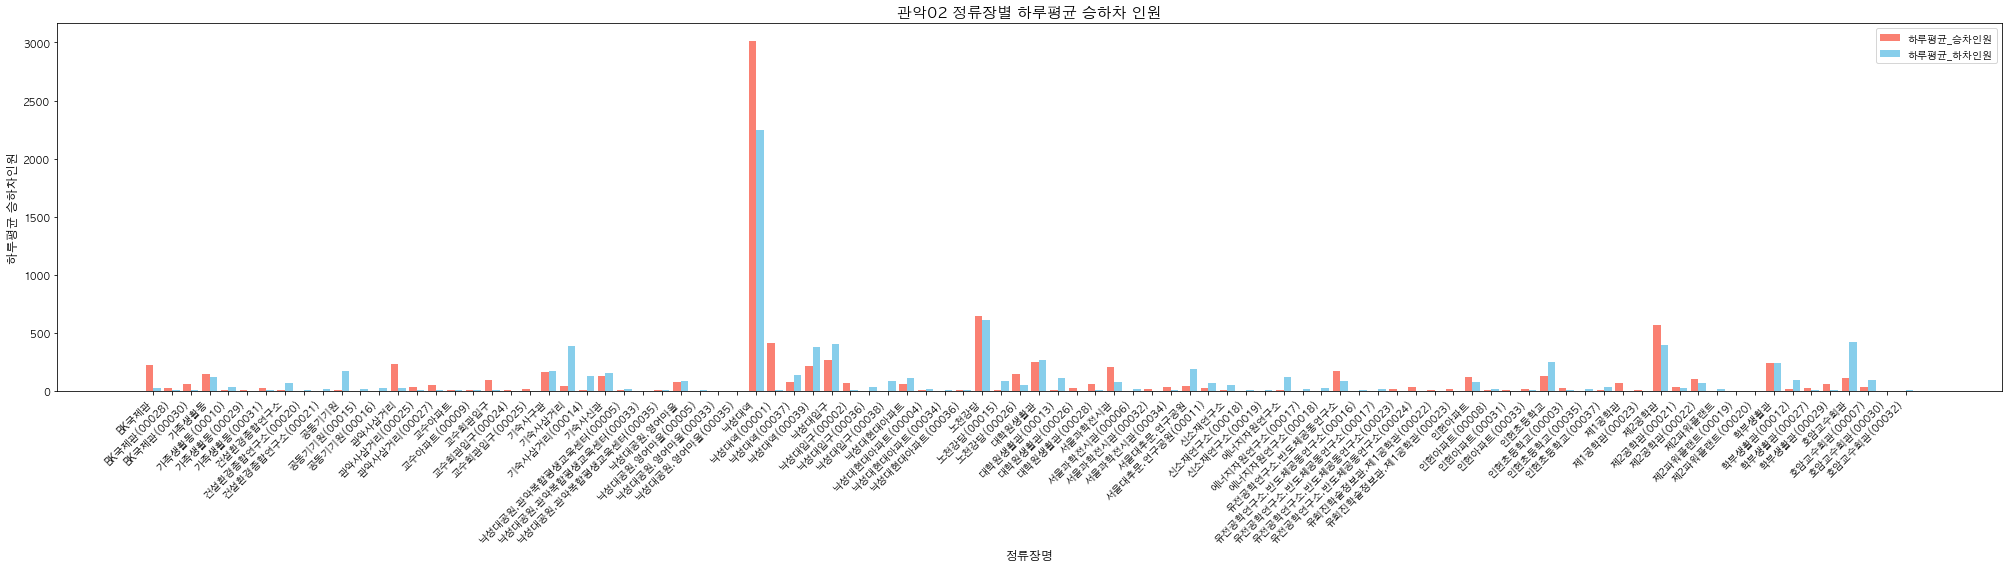

In [235]:
plt.rcParams['font.family'] = 'AppleGothic'

station_names = station_grouped['역명']
avg_ride = station_grouped['하루평균_승차인원']
avg_alight = station_grouped['하루평균_하차인원']

# 그래프 설정
plt.figure(figsize=(28, 8))  # 그래프 크기 설정

# 막대 그래프 간 간격 설정
bar_width = 0.4
index = np.arange(len(station_names))

# 하루평균 승차인원 막대 그래프
plt.bar(index, avg_ride, width=bar_width, label='하루평균_승차인원', color='salmon')

# 하루평균 하차인원 막대 그래프
plt.bar(index + bar_width, avg_alight, width=bar_width, label='하루평균_하차인원', color='skyblue')

# 역명 눈금 레이블 설정
plt.xticks(index + bar_width / 2, station_names, rotation=45, ha='right')

# 그래프 제목과 축 레이블 설정
plt.title('관악02 정류장별 하루평균 승하차 인원', fontsize=15)
plt.xlabel('정류장명', fontsize=12)
plt.ylabel('하루평균 승하차인원', fontsize=12)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()  # 그래프 간격 조정
plt.show()

## (2) 하루평균 승하차인원 TOP5

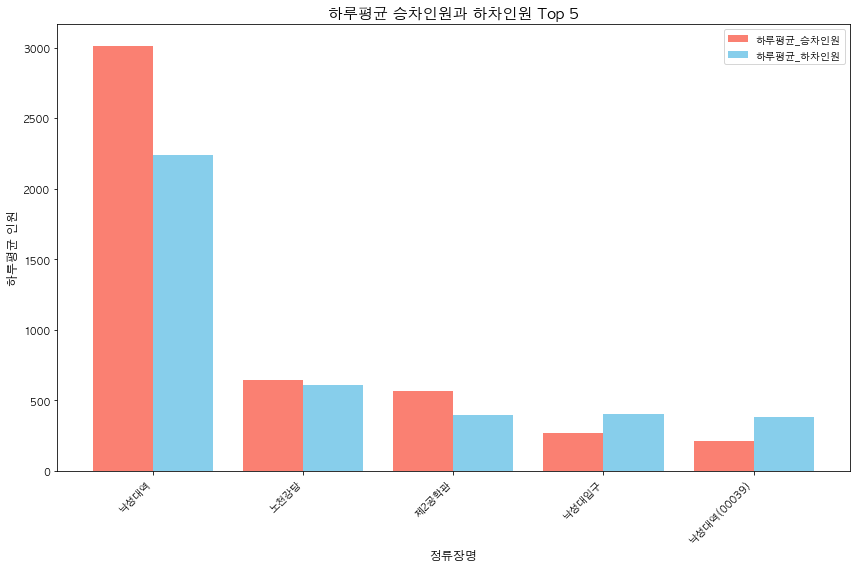

In [236]:
# station_grouped에서 하루평균 승차인원과 하차인원을 합산하여 총 이용 인원 계산
station_grouped['총_이용_인원'] = station_grouped['하루평균_승차인원'] + station_grouped['하루평균_하차인원']

# 총 이용 인원을 기준으로 top 5 추출
top_5_stations = station_grouped.nlargest(5, '총_이용_인원')

# top_5_stations에서 정류장명과 하루평균 승차, 하차인원 가져오기
station_names = top_5_stations['역명']
avg_ride = top_5_stations['하루평균_승차인원']
avg_alight = top_5_stations['하루평균_하차인원']

# 그래프 설정
plt.figure(figsize=(12, 8))

# 막대 그래프 간 간격 설정
bar_width = 0.4
index = np.arange(len(station_names))

# 하루평균 승차인원 막대 그래프
plt.bar(index, avg_ride, width=bar_width, label='하루평균_승차인원', color='salmon')

# 하루평균 하차인원 막대 그래프
plt.bar(index + bar_width, avg_alight, width=bar_width, label='하루평균_하차인원', color='skyblue')

# 역명 눈금 레이블 설정
plt.xticks(index + bar_width / 2, station_names, rotation=45, ha='right')

# 그래프 제목과 축 레이블 설정
plt.title('하루평균 승차인원과 하차인원 Top 5', fontsize=15)
plt.xlabel('정류장명', fontsize=12)
plt.ylabel('하루평균 인원', fontsize=12)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

In [70]:
top_5_stations

,역명,승차총승객수,하차총승객수,하루평균_승차인원,하루평균_하차인원,총_이용_인원
32,낙성대역,7389723.0,5497631.0,3013.753263,2242.100734,5255.853997
44,노천강당,1572603.0,1500392.0,641.355220,611.905383,1253.260604
80,제2공학관,1382601.0,970196.0,563.866639,395.675367,959.542007
36,낙성대입구,659136.0,986178.0,268.815661,402.193312,671.008972
35,낙성대역(00039),526363.0,931085.0,214.666803,379.724715,594.391517


In [71]:
# CSV 파일로 저장
output_file_path = "top_5_stations.csv"
top_5_stations.to_csv(output_file_path, index=False, encoding="utf-8")

## (3) 주요 정류장 시간별 승하차인원

In [100]:
# 사용할 열 선택 (시간 칼럼만 선택: 5시승차총승객수부터 23시하차총승객수까지)
time_columns = df_monthly.columns[4:]

# '역명'을 기준으로 그룹화하여 각 역별로 시간 칼럼들의 평균값을 계산
station_avg_time = df_monthly.groupby('역명')[time_columns].mean().reset_index()

# 결과 확인
# print(station_avg_time)

In [73]:
station_avg_time

,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
0,BK국제관,0.054545,0.000000,106.981818,8.527273,248.690909,14.054545,496.200000,29.127273,445.163636,...,506.072727,73.054545,285.018182,57.945455,226.236364,67.600000,171.036364,59.236364,86.545455,44.963636
1,BK국제관(00028),0.000000,0.000000,128.400000,5.800000,254.600000,29.600000,540.800000,44.200000,499.000000,...,570.400000,97.000000,323.200000,84.200000,272.200000,83.200000,238.000000,81.200000,108.600000,50.400000
2,BK국제관(00030),0.187500,0.000000,109.187500,4.812500,243.062500,15.750000,515.750000,53.812500,475.062500,...,539.812500,97.125000,325.562500,76.187500,274.375000,83.812500,205.187500,85.687500,120.312500,51.187500
3,가족생활동,0.063636,0.027273,44.354545,2.027273,105.900000,4.990909,181.336364,14.990909,137.545455,...,124.218182,204.136364,79.054545,169.127273,76.500000,173.718182,72.972727,163.927273,33.818182,112.472727
4,가족생활동(00010),0.000000,0.000000,0.000000,0.111111,0.000000,0.444444,0.500000,1.833333,0.111111,...,30.611111,385.722222,18.277778,319.777778,40.111111,352.888889,11.777778,332.944444,5.777778,244.388889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,학부생활관(00029),0.000000,0.000000,107.812500,7.687500,267.125000,8.250000,459.312500,83.062500,530.750000,...,625.312500,76.937500,351.062500,55.750000,332.937500,62.125000,240.812500,52.125000,148.812500,38.750000
90,호암교수회관,0.073333,0.013333,40.846667,234.146667,89.860000,399.360000,440.933333,1066.333333,509.973333,...,6.506667,241.586667,5.980000,191.126667,4.680000,184.846667,2.846667,179.426667,1.440000,131.646667
91,호암교수회관(00007),0.000000,0.000000,76.222222,709.777778,290.388889,1139.555556,1569.611111,2964.722222,1991.944444,...,4.444444,502.222222,2.000000,395.666667,1.611111,362.611111,0.833333,379.666667,0.833333,241.111111
92,호암교수회관(00030),0.000000,0.000000,2.200000,8.200000,1.600000,6.400000,19.000000,42.200000,8.000000,...,4.800000,56.000000,4.000000,45.800000,3.400000,61.600000,0.000000,49.400000,0.800000,35.600000


In [74]:
# station_avg_time의 모든 값에 30으로 나누기
station_avg_time.iloc[:, 1:] = station_avg_time.iloc[:, 1:] / 30

In [75]:
station_avg_time

,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
0,BK국제관,0.001818,0.000000,3.566061,0.284242,8.289697,0.468485,16.540000,0.970909,14.838788,...,16.869091,2.435152,9.500606,1.931515,7.541212,2.253333,5.701212,1.974545,2.884848,1.498788
1,BK국제관(00028),0.000000,0.000000,4.280000,0.193333,8.486667,0.986667,18.026667,1.473333,16.633333,...,19.013333,3.233333,10.773333,2.806667,9.073333,2.773333,7.933333,2.706667,3.620000,1.680000
2,BK국제관(00030),0.006250,0.000000,3.639583,0.160417,8.102083,0.525000,17.191667,1.793750,15.835417,...,17.993750,3.237500,10.852083,2.539583,9.145833,2.793750,6.839583,2.856250,4.010417,1.706250
3,가족생활동,0.002121,0.000909,1.478485,0.067576,3.530000,0.166364,6.044545,0.499697,4.584848,...,4.140606,6.804545,2.635152,5.637576,2.550000,5.790606,2.432424,5.464242,1.127273,3.749091
4,가족생활동(00010),0.000000,0.000000,0.000000,0.003704,0.000000,0.014815,0.016667,0.061111,0.003704,...,1.020370,12.857407,0.609259,10.659259,1.337037,11.762963,0.392593,11.098148,0.192593,8.146296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,학부생활관(00029),0.000000,0.000000,3.593750,0.256250,8.904167,0.275000,15.310417,2.768750,17.691667,...,20.843750,2.564583,11.702083,1.858333,11.097917,2.070833,8.027083,1.737500,4.960417,1.291667
90,호암교수회관,0.002444,0.000444,1.361556,7.804889,2.995333,13.312000,14.697778,35.544444,16.999111,...,0.216889,8.052889,0.199333,6.370889,0.156000,6.161556,0.094889,5.980889,0.048000,4.388222
91,호암교수회관(00007),0.000000,0.000000,2.540741,23.659259,9.679630,37.985185,52.320370,98.824074,66.398148,...,0.148148,16.740741,0.066667,13.188889,0.053704,12.087037,0.027778,12.655556,0.027778,8.037037
92,호암교수회관(00030),0.000000,0.000000,0.073333,0.273333,0.053333,0.213333,0.633333,1.406667,0.266667,...,0.160000,1.866667,0.133333,1.526667,0.113333,2.053333,0.000000,1.646667,0.026667,1.186667


### 1) 낙성대역 

In [76]:
# # 사용할 시간 칼럼 선택 (5시승차총승객수부터 23시하차총승객수까지)
# time_columns = df_monthly.columns[4:]

# # '역명'을 기준으로 그룹화하여 각 역별로 시간 칼럼들의 합을 계산
# station_avg_time2 = df_monthly.groupby('역명')[time_columns].sum().reset_index()

# # 각 시간 칼럼들을 사용한 총 일수 계산
# num_days = len(df_monthly['사용년월'].unique())

# # 각 시간대별로 역명별 평균값 계산
# for col in time_columns:
#     station_avg_time2[col] = station_avg_time2[col] / num_days

# # 결과 확인
# # print(station_avg_time2)

In [77]:
busstop1 = station_avg_time[station_avg_time['역명'] == '낙성대역']

In [78]:
busstop1

,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
32,낙성대역,10.717576,5.202121,41.569091,20.706667,80.274848,32.041515,217.235152,54.610606,216.79303,...,71.845758,92.912121,67.936667,65.695455,78.033636,60.744848,89.152424,52.183636,60.059697,34.347273


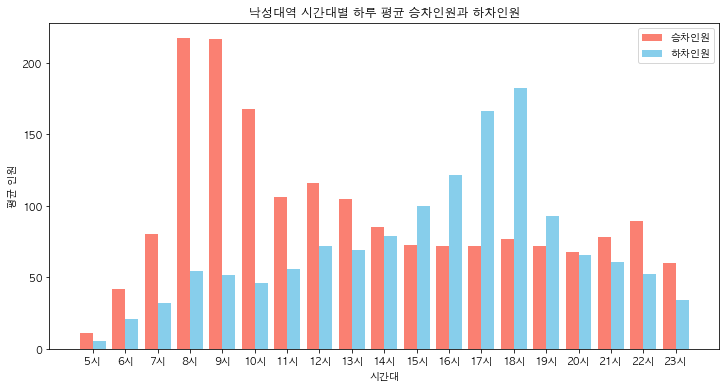

In [237]:
# 시간대
hours = range(5, 24)

# 승차인원과 하차인원 추출
boarding = busstop1.filter(like='승차총승객수').values.flatten()
alighting = busstop1.filter(like='하차총승객수').values.flatten()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 각 시간대별 승차인원과 하차인원 막대그래프 그리기
width = 0.4  # 막대 너비 설정
ax.bar(np.array(hours) - width/2, boarding, width=width, label='승차인원', color='salmon')
ax.bar(np.array(hours) + width/2, alighting, width=width, label='하차인원', color='skyblue')

# 그래프 제목과 축 레이블 설정
ax.set_title('낙성대역 시간대별 하루 평균 승차인원과 하차인원')
ax.set_xlabel('시간대')
ax.set_ylabel('평균 인원')

# x축 눈금 레이블 설정
ax.set_xticks(hours)
ax.set_xticklabels([str(hour) + '시' for hour in hours])

# 범례 표시
ax.legend()

plt.show()

cf) 예상과 일치: 수업시작 전에는 승차인원이 많고 수업 끝난 후에는 하차인원이 많음

### 2) 호암교수회관

In [80]:
busstop2 = station_avg_time[station_avg_time['역명'] == '호암교수회관']

In [81]:
busstop2

,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
90,호암교수회관,0.002444,0.000444,1.361556,7.804889,2.995333,13.312,14.697778,35.544444,16.999111,...,0.216889,8.052889,0.199333,6.370889,0.156,6.161556,0.094889,5.980889,0.048,4.388222


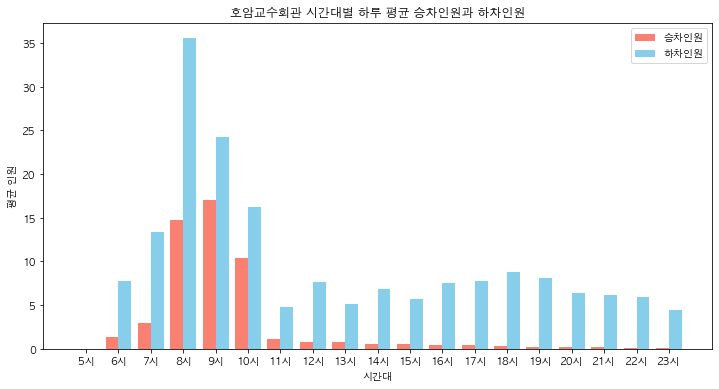

In [238]:
# 시간대
hours = range(5, 24)

# 승차인원과 하차인원 추출
boarding = busstop2.filter(like='승차총승객수').values.flatten()
alighting = busstop2.filter(like='하차총승객수').values.flatten()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 각 시간대별 승차인원과 하차인원 막대그래프 그리기
width = 0.4  # 막대 너비 설정
ax.bar(np.array(hours) - width/2, boarding, width=width, label='승차인원', color='salmon')
ax.bar(np.array(hours) + width/2, alighting, width=width, label='하차인원', color='skyblue')

# 그래프 제목과 축 레이블 설정
ax.set_title('호암교수회관 시간대별 하루 평균 승차인원과 하차인원')
ax.set_xlabel('시간대')
ax.set_ylabel('평균 인원')

# x축 눈금 레이블 설정
ax.set_xticks(hours)
ax.set_xticklabels([str(hour) + '시' for hour in hours])

# 범례 표시
ax.legend()

plt.show()

cf) 타는 사람이 별로 없다(근데 기다리는 거 생각하면 하차인원이 있으면 승차인원도 있었어야 하지않나?)

### 3) 가족생활동

In [83]:
busstop3 = station_avg_time[station_avg_time['역명'] == '가족생활동']

In [84]:
busstop3

,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
3,가족생활동,0.002121,0.000909,1.478485,0.067576,3.53,0.166364,6.044545,0.499697,4.584848,...,4.140606,6.804545,2.635152,5.637576,2.55,5.790606,2.432424,5.464242,1.127273,3.749091


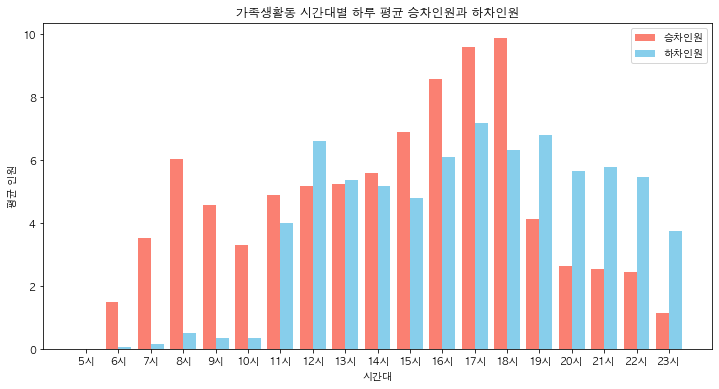

In [239]:
# 시간대
hours = range(5, 24)

# 승차인원과 하차인원 추출
boarding = busstop3.filter(like='승차총승객수').values.flatten()
alighting = busstop3.filter(like='하차총승객수').values.flatten()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 각 시간대별 승차인원과 하차인원 막대그래프 그리기
width = 0.4  # 막대 너비 설정
ax.bar(np.array(hours) - width/2, boarding, width=width, label='승차인원', color='salmon')
ax.bar(np.array(hours) + width/2, alighting, width=width, label='하차인원', color='skyblue')

# 그래프 제목과 축 레이블 설정
ax.set_title('가족생활동 시간대별 하루 평균 승차인원과 하차인원')
ax.set_xlabel('시간대')
ax.set_ylabel('평균 인원')

# x축 눈금 레이블 설정
ax.set_xticks(hours)
ax.set_xticklabels([str(hour) + '시' for hour in hours])

# 범례 표시
ax.legend()

plt.show()

cf) 18시 이후 호암교수회관보다는 그나마 승차인원 많음 -> 가족생활동에서 타라 

# 2. 2023년: 학기(3-6월, 9-12월) vs 방학

## 데이터 세팅

In [86]:
# 2023년 데이터 추출
df_2023 = df_monthly[df_monthly['사용년월'].astype(str).str.startswith('2023')]

In [87]:
df_2023

,사용년월,노선번호,노선명,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
2383,202302,관악02,관악02(낙성대역~서울대신공학관),신소재연구소(00018),0,0,0,42,0,56,...,9,13,1,10,0,4,1,5,0,2
2384,202302,관악02,관악02(낙성대역~서울대신공학관),신소재연구소(00019),0,0,0,15,0,14,...,1,4,0,4,1,1,0,3,0,0
2385,202302,관악02,관악02(낙성대역~서울대신공학관),제2공학관(00022),3,0,5,34,14,94,...,361,38,185,20,178,31,184,11,81,5
2386,202302,관악02,관악02(낙성대역~서울대신공학관),제2공학관(00021),0,0,17,95,15,292,...,951,88,680,52,621,70,596,30,249,21
2387,202302,관악02,관악02(낙성대역~서울대신공학관),유회진학술정보관.제1공학관(00022),0,0,4,0,11,0,...,187,3,132,0,116,0,75,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,202307,관악02,관악02(낙성대역~서울대신공학관),낙성대입구(00002),0,0,343,78,225,20,...,501,122,489,81,590,60,562,45,613,19
2907,202307,관악02,관악02(낙성대역~서울대신공학관),인헌초등학교(00003),0,0,25,32,117,61,...,180,163,226,56,209,66,139,63,113,49
2908,202307,관악02,관악02(낙성대역~서울대신공학관),호암교수회관(00032),0,0,1,14,5,11,...,6,118,3,77,4,119,0,140,1,35
2909,202307,관악02,관악02(낙성대역~서울대신공학관),호암교수회관(00007),0,0,98,844,322,1253,...,7,568,1,548,0,402,1,409,1,251


In [88]:
# 사용년월을 정수형으로 변환하여 월 추출
df_2023['월'] = df_2023['사용년월'].astype(int) % 100

<ipython-input-88-26c5ed5b4dd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['월'] = df_2023['사용년월'].astype(int) % 100


In [89]:
df_2023

,사용년월,노선번호,노선명,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,월
2383,202302,관악02,관악02(낙성대역~서울대신공학관),신소재연구소(00018),0,0,0,42,0,56,...,13,1,10,0,4,1,5,0,2,2
2384,202302,관악02,관악02(낙성대역~서울대신공학관),신소재연구소(00019),0,0,0,15,0,14,...,4,0,4,1,1,0,3,0,0,2
2385,202302,관악02,관악02(낙성대역~서울대신공학관),제2공학관(00022),3,0,5,34,14,94,...,38,185,20,178,31,184,11,81,5,2
2386,202302,관악02,관악02(낙성대역~서울대신공학관),제2공학관(00021),0,0,17,95,15,292,...,88,680,52,621,70,596,30,249,21,2
2387,202302,관악02,관악02(낙성대역~서울대신공학관),유회진학술정보관.제1공학관(00022),0,0,4,0,11,0,...,3,132,0,116,0,75,0,56,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,202307,관악02,관악02(낙성대역~서울대신공학관),낙성대입구(00002),0,0,343,78,225,20,...,122,489,81,590,60,562,45,613,19,7
2907,202307,관악02,관악02(낙성대역~서울대신공학관),인헌초등학교(00003),0,0,25,32,117,61,...,163,226,56,209,66,139,63,113,49,7
2908,202307,관악02,관악02(낙성대역~서울대신공학관),호암교수회관(00032),0,0,1,14,5,11,...,118,3,77,4,119,0,140,1,35,7
2909,202307,관악02,관악02(낙성대역~서울대신공학관),호암교수회관(00007),0,0,98,844,322,1253,...,568,1,548,0,402,1,409,1,251,7


In [90]:
# 학기 중(3, 4, 5, 6, 9, 10, 11, 12월)과 방학 중(1, 2, 7, 8월) 구분
semester_months = [3, 4, 5, 6, 9, 10, 11, 12]
vacation_months = [1, 2, 7, 8]

df_2023['학기중여부'] = df_2023['월'].isin(semester_months)

<ipython-input-90-9b52a759122e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['학기중여부'] = df_2023['월'].isin(semester_months)


In [91]:
df_2023

,사용년월,노선번호,노선명,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,...,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,월,학기중여부
2383,202302,관악02,관악02(낙성대역~서울대신공학관),신소재연구소(00018),0,0,0,42,0,56,...,1,10,0,4,1,5,0,2,2,False
2384,202302,관악02,관악02(낙성대역~서울대신공학관),신소재연구소(00019),0,0,0,15,0,14,...,0,4,1,1,0,3,0,0,2,False
2385,202302,관악02,관악02(낙성대역~서울대신공학관),제2공학관(00022),3,0,5,34,14,94,...,185,20,178,31,184,11,81,5,2,False
2386,202302,관악02,관악02(낙성대역~서울대신공학관),제2공학관(00021),0,0,17,95,15,292,...,680,52,621,70,596,30,249,21,2,False
2387,202302,관악02,관악02(낙성대역~서울대신공학관),유회진학술정보관.제1공학관(00022),0,0,4,0,11,0,...,132,0,116,0,75,0,56,0,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,202307,관악02,관악02(낙성대역~서울대신공학관),낙성대입구(00002),0,0,343,78,225,20,...,489,81,590,60,562,45,613,19,7,False
2907,202307,관악02,관악02(낙성대역~서울대신공학관),인헌초등학교(00003),0,0,25,32,117,61,...,226,56,209,66,139,63,113,49,7,False
2908,202307,관악02,관악02(낙성대역~서울대신공학관),호암교수회관(00032),0,0,1,14,5,11,...,3,77,4,119,0,140,1,35,7,False
2909,202307,관악02,관악02(낙성대역~서울대신공학관),호암교수회관(00007),0,0,98,844,322,1253,...,1,548,0,402,1,409,1,251,7,False


In [104]:
# CSV 파일로 저장
output_file_path = 'df_2023.csv'
df_2023.to_csv(output_file_path, index=False, encoding="utf-8")

In [107]:
# '학기중'과 '방학중' 데이터 분리
df_2023_semester = df_2023[df_2023['학기중여부']]
df_2023_vacation = df_2023[~df_2023['학기중여부']]

# 필요없는 열 제거
df_2023_semester = df_2023_semester.drop(['월', '학기중여부'], axis=1)
df_2023_vacation = df_2023_vacation.drop(['월', '학기중여부'], axis=1)

In [108]:
df_2023_semester

,사용년월,노선번호,노선명,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
2445,202312,관악02,관악02(낙성대역~서울대신공학관),신소재연구소(00019),0,0,0,76,1,109,...,12,21,3,18,7,13,5,10,0,8
2446,202312,관악02,관악02(낙성대역~서울대신공학관),제2공학관(00022),0,0,53,133,33,357,...,1503,158,1177,119,1164,96,1045,89,434,44
2447,202312,관악02,관악02(낙성대역~서울대신공학관),유회진학술정보관.제1공학관(00023),0,0,11,0,10,2,...,246,2,164,0,171,0,162,0,110,0
2448,202312,관악02,관악02(낙성대역~서울대신공학관),유전공학연구소.반도체공동연구소(00024),0,0,9,1,15,0,...,421,7,288,2,296,3,208,1,156,0
2449,202312,관악02,관악02(낙성대역~서울대신공학관),교수회관입구(00025),0,0,18,0,4,2,...,122,0,70,1,83,0,46,1,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,202306,관악02,관악02(낙성대역~서울대신공학관),낙성대입구(00002),5,0,363,66,312,11,...,526,68,576,41,754,85,712,89,767,34
2829,202306,관악02,관악02(낙성대역~서울대신공학관),인헌초등학교(00003),0,0,30,25,125,58,...,213,126,194,53,203,61,140,55,98,30
2830,202306,관악02,관악02(낙성대역~서울대신공학관),호암교수회관(00007),0,0,86,814,295,1255,...,4,543,2,442,6,373,2,395,2,219
2831,202306,관악02,관악02(낙성대역~서울대신공학관),호암교수회관(00032),0,0,0,7,1,22,...,7,76,0,65,2,63,1,64,0,47


In [109]:
# CSV 파일로 저장
output_file_path = 'df_2023_semester.csv'
df_2023_semester.to_csv(output_file_path, index=False, encoding="utf-8")

In [110]:
df_2023_vacation

,사용년월,노선번호,노선명,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
2383,202302,관악02,관악02(낙성대역~서울대신공학관),신소재연구소(00018),0,0,0,42,0,56,...,9,13,1,10,0,4,1,5,0,2
2384,202302,관악02,관악02(낙성대역~서울대신공학관),신소재연구소(00019),0,0,0,15,0,14,...,1,4,0,4,1,1,0,3,0,0
2385,202302,관악02,관악02(낙성대역~서울대신공학관),제2공학관(00022),3,0,5,34,14,94,...,361,38,185,20,178,31,184,11,81,5
2386,202302,관악02,관악02(낙성대역~서울대신공학관),제2공학관(00021),0,0,17,95,15,292,...,951,88,680,52,621,70,596,30,249,21
2387,202302,관악02,관악02(낙성대역~서울대신공학관),유회진학술정보관.제1공학관(00022),0,0,4,0,11,0,...,187,3,132,0,116,0,75,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,202307,관악02,관악02(낙성대역~서울대신공학관),낙성대입구(00002),0,0,343,78,225,20,...,501,122,489,81,590,60,562,45,613,19
2907,202307,관악02,관악02(낙성대역~서울대신공학관),인헌초등학교(00003),0,0,25,32,117,61,...,180,163,226,56,209,66,139,63,113,49
2908,202307,관악02,관악02(낙성대역~서울대신공학관),호암교수회관(00032),0,0,1,14,5,11,...,6,118,3,77,4,119,0,140,1,35
2909,202307,관악02,관악02(낙성대역~서울대신공학관),호암교수회관(00007),0,0,98,844,322,1253,...,7,568,1,548,0,402,1,409,1,251


In [111]:
# CSV 파일로 저장
output_file_path = 'df_2023_vacation.csv'
df_2023_vacation.to_csv(output_file_path, index=False, encoding="utf-8")

In [112]:
# 사용할 열 선택 (시간 칼럼만 선택: 5시승차총승객수부터 23시하차총승객수까지)
time_columns = df_2023_semester.columns[4:]

# '역명'을 기준으로 그룹화하여 각 역별로 시간 칼럼들의 평균값을 계산
station_avg_time_semester = df_2023_semester.groupby('역명')[time_columns].mean().reset_index()

# station_avg_time의 모든 값에 30으로 나누기
station_avg_time_semester.iloc[:, 1:] = station_avg_time_semester.iloc[:, 1:] / 30

In [113]:
station_avg_time_semester

,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
0,BK국제관(00030),0.012500,0.000000,4.404167,0.250000,10.433333,0.525000,21.625000,2.375000,19.629167,...,23.520833,4.216667,13.991667,3.345833,12.645833,4.008333,9.470833,4.137500,5.470833,2.612500
1,가족생활동(00010),0.000000,0.000000,0.000000,0.004167,0.000000,0.004167,0.012500,0.045833,0.008333,...,1.087500,12.312500,0.641667,11.070833,1.145833,11.491667,0.304167,11.358333,0.191667,8.141667
2,가족생활동(00031),0.000000,0.000000,4.700000,0.237500,9.354167,0.625000,13.687500,1.966667,10.333333,...,7.145833,1.645833,3.900000,1.462500,4.954167,1.475000,2.720833,1.075000,1.629167,0.762500
3,건설환경종합연구소(00021),0.000000,0.000000,0.025000,2.816667,0.016667,2.720833,0.066667,4.866667,0.200000,...,0.216667,0.287500,0.095833,0.216667,0.004167,0.100000,0.041667,0.091667,0.029167,0.058333
4,공동기기원(00016),0.000000,0.000000,0.033333,5.250000,0.029167,6.104167,0.316667,39.291667,0.891667,...,0.141667,1.654167,0.241667,1.395833,0.141667,1.041667,0.050000,0.779167,0.204167,0.487500
5,관악사삼거리(00027),0.000000,0.000000,1.770833,0.208333,4.058333,0.191667,11.720833,0.204167,8.900000,...,25.729167,3.341667,24.745833,2.975000,26.066667,3.658333,18.950000,3.408333,9.233333,1.983333
6,교수아파트(00009),0.000000,0.000000,0.495833,0.004167,0.000000,0.000000,0.025000,0.004167,0.008333,...,0.925000,4.108333,1.004167,3.070833,0.641667,2.979167,0.241667,2.633333,0.137500,1.879167
7,교수회관입구(00025),0.000000,0.000000,0.741667,0.016667,0.175000,0.020833,0.270833,0.050000,0.816667,...,7.133333,0.120833,4.508333,0.058333,4.408333,0.045833,2.654167,0.037500,2.179167,0.016667
8,기숙사삼거리(00014),0.000000,0.000000,0.354167,5.962500,1.283333,13.129167,4.016667,56.358333,9.208333,...,0.929167,11.212500,0.762500,8.737500,0.479167,7.029167,0.333333,6.050000,0.116667,2.254167
9,낙성대공원.관악복합평생교육센터(00005),0.000000,0.000000,0.908333,1.379167,0.995833,2.808333,2.854167,7.329167,2.662500,...,1.141667,3.345833,1.075000,2.383333,1.083333,1.483333,1.000000,0.887500,0.337500,0.541667


In [159]:
# CSV 파일로 저장
output_file_path = "station_avg_time_semester.csv"
station_avg_time_semester.to_csv(output_file_path, index=False, encoding="utf-8")

In [114]:
# 사용할 열 선택 (시간 칼럼만 선택: 5시승차총승객수부터 23시하차총승객수까지)
time_columns = df_2023_vacation.columns[4:]

# '역명'을 기준으로 그룹화하여 각 역별로 시간 칼럼들의 평균값을 계산
station_avg_time_vacation = df_2023_vacation.groupby('역명')[time_columns].mean().reset_index()

# station_avg_time의 모든 값에 30으로 나누기
station_avg_time_vacation.iloc[:, 1:] = station_avg_time_vacation.iloc[:, 1:] / 30

In [115]:
station_avg_time_vacation

,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
0,BK국제관(00028),0.0,0.0,4.733333,0.216667,8.450000,0.850000,17.316667,2.016667,16.450000,...,16.300000,3.366667,9.233333,2.583333,7.650000,2.266667,7.283333,2.850000,2.500000,1.683333
1,BK국제관(00030),0.0,0.0,4.325000,0.100000,9.166667,0.708333,20.083333,2.050000,18.500000,...,18.175000,3.275000,11.650000,2.633333,8.450000,2.600000,5.891667,2.466667,3.925000,1.158333
2,가족생활동(00010),0.0,0.0,0.000000,0.000000,0.000000,0.033333,0.013333,0.066667,0.000000,...,0.906667,13.620000,0.500000,10.786667,1.633333,12.293333,0.493333,10.740000,0.173333,7.933333
3,가족생활동(00029),0.0,0.0,2.800000,0.100000,8.816667,0.750000,10.433333,1.850000,7.500000,...,7.666667,1.500000,3.916667,1.100000,4.200000,0.966667,2.050000,0.866667,1.816667,0.483333
4,가족생활동(00031),0.0,0.0,4.308333,0.216667,8.500000,0.625000,12.250000,1.883333,7.625000,...,6.483333,1.275000,3.883333,1.083333,3.258333,1.091667,2.641667,0.850000,1.266667,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,학부생활관(00027),0.0,0.0,4.716667,0.116667,12.516667,0.333333,21.766667,3.166667,22.466667,...,16.600000,1.916667,9.416667,1.333333,8.083333,1.216667,7.583333,1.500000,3.183333,0.583333
58,학부생활관(00029),0.0,0.0,6.066667,0.133333,15.200000,0.225000,21.158333,3.550000,22.308333,...,19.041667,1.833333,11.533333,1.408333,9.166667,1.250000,7.025000,1.258333,4.658333,0.616667
59,호암교수회관(00007),0.0,0.0,2.260000,24.526667,8.673333,39.606667,50.286667,106.613333,53.153333,...,0.153333,16.746667,0.060000,14.933333,0.026667,12.240000,0.020000,12.886667,0.026667,7.666667
60,호암교수회관(00030),0.0,0.0,0.100000,0.300000,0.100000,0.066667,0.150000,1.300000,0.066667,...,0.166667,1.750000,0.200000,1.350000,0.033333,1.633333,0.000000,1.550000,0.016667,0.983333


In [160]:
# CSV 파일로 저장
output_file_path = "station_avg_time_vacation.csv"
station_avg_time_vacation.to_csv(output_file_path, index=False, encoding="utf-8")

## (1) 정류장별 하루평균 승하차인원

In [119]:
df_daily_2023 = pd.read_csv('DATA_daily_2023.csv',encoding='cp949')

In [120]:
df_daily_2023

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20230901,관악02,관악02(낙성대역~서울대신공학관),120000172.0,21274,신소재연구소(00019),8.0,69.0,20230904.0
1,20230901,관악02,관악02(낙성대역~서울대신공학관),120000173.0,21275,제2공학관(00022),689.0,528.0,20230904.0
2,20230901,관악02,관악02(낙성대역~서울대신공학관),120000174.0,21276,유회진학술정보관.제1공학관(00023),195.0,1.0,20230904.0
3,20230901,관악02,관악02(낙성대역~서울대신공학관),120000175.0,21277,유전공학연구소.반도체공동연구소(00024),265.0,4.0,20230904.0
4,20230901,관악02,관악02(낙성대역~서울대신공학관),120000176.0,21278,교수회관입구(00025),70.0,2.0,20230904.0
...,...,...,...,...,...,...,...,...,...
13960,20230731,관악02,관악02(낙성대역~서울대신공학관),120900183.0,21800,낙성대입구(00002),242.0,38.0,20230803.0
13961,20230731,관악02,관악02(낙성대역~서울대신공학관),120900184.0,21819,인헌초등학교(00003),91.0,58.0,20230803.0
13962,20230731,관악02,관악02(낙성대역~서울대신공학관),120900185.0,21870,호암교수회관(00007),183.0,548.0,20230803.0
13963,20230731,관악02,관악02(낙성대역~서울대신공학관),120900185.0,21870,호암교수회관(00032),0.0,39.0,20230803.0


In [121]:
# 사용일자를 기준으로 월을 추출하여 '월' 컬럼 추가
df_daily_2023['월'] = pd.to_datetime(df_daily_2023['사용일자'], format='%Y%m%d').dt.month

In [123]:
# 분리할 월 리스트 정의
semester_months = [3, 4, 5, 6, 9, 10, 11, 12]
vacation_months = [1, 2, 7, 8]

In [124]:
# 학기중 여부 컬럼 추가
df_daily_2023['학기중여부'] = df_daily_2023['월'].isin(semester_months)

In [126]:
# 학기중 데이터와 방학중 데이터 분리
df_daily_2023_semester = df_daily_2023[df_daily_2023['학기중여부'] == True]
df_daily_2023_vacation = df_daily_2023[df_daily_2023['학기중여부'] == False]

In [127]:
# 필요없는 컬럼 제거 (선택 사항)
df_daily_2023_semester.drop(['월', '학기중여부'], axis=1, inplace=True)
df_daily_2023_vacation.drop(['월', '학기중여부'], axis=1, inplace=True)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [128]:
df_daily_2023_semester

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20230901,관악02,관악02(낙성대역~서울대신공학관),120000172.0,21274,신소재연구소(00019),8.0,69.0,20230904.0
1,20230901,관악02,관악02(낙성대역~서울대신공학관),120000173.0,21275,제2공학관(00022),689.0,528.0,20230904.0
2,20230901,관악02,관악02(낙성대역~서울대신공학관),120000174.0,21276,유회진학술정보관.제1공학관(00023),195.0,1.0,20230904.0
3,20230901,관악02,관악02(낙성대역~서울대신공학관),120000175.0,21277,유전공학연구소.반도체공동연구소(00024),265.0,4.0,20230904.0
4,20230901,관악02,관악02(낙성대역~서울대신공학관),120000176.0,21278,교수회관입구(00025),70.0,2.0,20230904.0
...,...,...,...,...,...,...,...,...,...
12751,20231231,관악02,관악02(낙성대역~서울대신공학관),120000175.0,21277,유전공학연구소.반도체공동연구소(00024),19.0,0.0,20240103.0
12752,20231231,관악02,관악02(낙성대역~서울대신공학관),120900161.0,21895,학부생활관(00012),8.0,219.0,20240103.0
12753,20231231,관악02,관악02(낙성대역~서울대신공학관),120900027.0,21564,대학원생활관(00028),408.0,7.0,20240103.0
12754,20231231,관악02,관악02(낙성대역~서울대신공학관),120900162.0,21897,대학원생활관(00013),4.0,189.0,20240103.0


In [130]:
df_daily_2023_vacation

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1170,20230801,관악02,관악02(낙성대역~서울대신공학관),120000172.0,21274,신소재연구소(00019),5.0,64.0,20230804.0
1171,20230801,관악02,관악02(낙성대역~서울대신공학관),120000173.0,21275,제2공학관(00022),641.0,443.0,20230804.0
1172,20230801,관악02,관악02(낙성대역~서울대신공학관),120000174.0,21276,유회진학술정보관.제1공학관(00023),153.0,1.0,20230804.0
1173,20230801,관악02,관악02(낙성대역~서울대신공학관),120000175.0,21277,유전공학연구소.반도체공동연구소(00024),255.0,7.0,20230804.0
1174,20230801,관악02,관악02(낙성대역~서울대신공학관),120000176.0,21278,교수회관입구(00025),141.0,1.0,20230804.0
...,...,...,...,...,...,...,...,...,...
13960,20230731,관악02,관악02(낙성대역~서울대신공학관),120900183.0,21800,낙성대입구(00002),242.0,38.0,20230803.0
13961,20230731,관악02,관악02(낙성대역~서울대신공학관),120900184.0,21819,인헌초등학교(00003),91.0,58.0,20230803.0
13962,20230731,관악02,관악02(낙성대역~서울대신공학관),120900185.0,21870,호암교수회관(00007),183.0,548.0,20230803.0
13963,20230731,관악02,관악02(낙성대역~서울대신공학관),120900185.0,21870,호암교수회관(00032),0.0,39.0,20230803.0


In [136]:
# '역명'을 기준으로 그룹화하여 각 역별로 승차총승객수와 하차총승객수의 합을 계산
station_grouped_semester = df_daily_2023_semester.groupby('역명',as_index=False).agg({
    '승차총승객수': 'sum',
    '하차총승객수': 'sum'
})

In [137]:
station_grouped_semester

,역명,승차총승객수,하차총승객수
0,BK국제관(00030),97141.0,12810.0
1,가족생활동(00010),7469.0,34494.0
2,가족생활동(00031),36982.0,5927.0
3,건설환경종합연구소(00021),3812.0,19817.0
4,공동기기원(00016),2387.0,46613.0
5,관악사삼거리(00027),97099.0,6602.0
6,교수아파트(00009),5800.0,10763.0
7,교수회관입구(00025),24296.0,703.0
8,기숙사삼거리(00014),11917.0,146570.0
9,낙성대공원.관악복합평생교육센터(00005),7165.0,16892.0


In [143]:
# 각 역별로 하루 평균 승차 인원과 하차 인원을 계산하여 새로운 열에 추가
num_days = len(df_daily_2023_semester['사용일자'].unique())  
station_grouped_semester['하루평균_승차인원'] = station_grouped_semester['승차총승객수'] / num_days
station_grouped_semester['하루평균_하차인원'] = station_grouped_semester['하차총승객수'] / num_days

In [144]:
num_days = len(df_daily_2023_semester['사용일자'].unique())
num_days

240

In [145]:
station_grouped_semester

,역명,승차총승객수,하차총승객수,하루평균_승차인원,하루평균_하차인원
0,BK국제관(00030),97141.0,12810.0,404.754167,53.375000
1,가족생활동(00010),7469.0,34494.0,31.120833,143.725000
2,가족생활동(00031),36982.0,5927.0,154.091667,24.695833
3,건설환경종합연구소(00021),3812.0,19817.0,15.883333,82.570833
4,공동기기원(00016),2387.0,46613.0,9.945833,194.220833
5,관악사삼거리(00027),97099.0,6602.0,404.579167,27.508333
6,교수아파트(00009),5800.0,10763.0,24.166667,44.845833
7,교수회관입구(00025),24296.0,703.0,101.233333,2.929167
8,기숙사삼거리(00014),11917.0,146570.0,49.654167,610.708333
9,낙성대공원.관악복합평생교육센터(00005),7165.0,16892.0,29.854167,70.383333


In [146]:
# '역명'을 기준으로 그룹화하여 각 역별로 승차총승객수와 하차총승객수의 합을 계산
station_grouped_vacation = df_daily_2023_vacation.groupby('역명',as_index=False).agg({
    '승차총승객수': 'sum',
    '하차총승객수': 'sum'
})

In [147]:
station_grouped_vacation

,역명,승차총승객수,하차총승객수
0,BK국제관(00028),18498.0,1911.0
1,BK국제관(00030),27495.0,2936.0
2,가족생활동(00010),3110.0,17127.0
3,가족생활동(00029),8309.0,995.0
4,가족생활동(00031),11413.0,1729.0
...,...,...,...
57,학부생활관(00027),20904.0,1403.0
58,학부생활관(00029),32729.0,2393.0
59,호암교수회관(00007),17216.0,52826.0
60,호암교수회관(00030),157.0,1465.0


In [148]:
# 각 역별로 하루 평균 승차 인원과 하차 인원을 계산하여 새로운 열에 추가
num_days = len(df_daily_2023_vacation['사용일자'].unique())  
station_grouped_vacation['하루평균_승차인원'] = station_grouped_vacation['승차총승객수'] / num_days
station_grouped_vacation['하루평균_하차인원'] = station_grouped_vacation['하차총승객수'] / num_days

In [149]:
num_days = len(df_daily_2023_vacation['사용일자'].unique())
num_days

121

In [150]:
station_grouped_vacation

,역명,승차총승객수,하차총승객수,하루평균_승차인원,하루평균_하차인원
0,BK국제관(00028),18498.0,1911.0,152.876033,15.793388
1,BK국제관(00030),27495.0,2936.0,227.231405,24.264463
2,가족생활동(00010),3110.0,17127.0,25.702479,141.545455
3,가족생활동(00029),8309.0,995.0,68.669421,8.223140
4,가족생활동(00031),11413.0,1729.0,94.322314,14.289256
...,...,...,...,...,...
57,학부생활관(00027),20904.0,1403.0,172.760331,11.595041
58,학부생활관(00029),32729.0,2393.0,270.487603,19.776860
59,호암교수회관(00007),17216.0,52826.0,142.280992,436.578512
60,호암교수회관(00030),157.0,1465.0,1.297521,12.107438


In [ ]:
# 정류장명을 기준으로 데이터프레임 병합
merged_df = station_grouped_semester.merge(station_grouped_vacation, on='역명', suffixes=('_semester', '_vacation'))

In [153]:
merged_df

,역명,승차총승객수_semester,하차총승객수_semester,하루평균_승차인원_semester,하루평균_하차인원_semester,승차총승객수_vacation,하차총승객수_vacation,하루평균_승차인원_vacation,하루평균_하차인원_vacation
0,BK국제관(00030),97141.0,12810.0,404.754167,53.375000,27495.0,2936.0,227.231405,24.264463
1,가족생활동(00010),7469.0,34494.0,31.120833,143.725000,3110.0,17127.0,25.702479,141.545455
2,가족생활동(00031),36982.0,5927.0,154.091667,24.695833,11413.0,1729.0,94.322314,14.289256
3,건설환경종합연구소(00021),3812.0,19817.0,15.883333,82.570833,342.0,5528.0,2.826446,45.685950
4,공동기기원(00016),2387.0,46613.0,9.945833,194.220833,787.0,15386.0,6.504132,127.157025
5,관악사삼거리(00027),97099.0,6602.0,404.579167,27.508333,22241.0,1978.0,183.809917,16.347107
6,교수아파트(00009),5800.0,10763.0,24.166667,44.845833,2470.0,5216.0,20.413223,43.107438
7,교수회관입구(00025),24296.0,703.0,101.233333,2.929167,8810.0,182.0,72.809917,1.504132
8,기숙사삼거리(00014),11917.0,146570.0,49.654167,610.708333,5149.0,54007.0,42.553719,446.338843
9,낙성대공원.관악복합평생교육센터(00005),7165.0,16892.0,29.854167,70.383333,3141.0,6521.0,25.958678,53.892562


### 1) 승차인원 

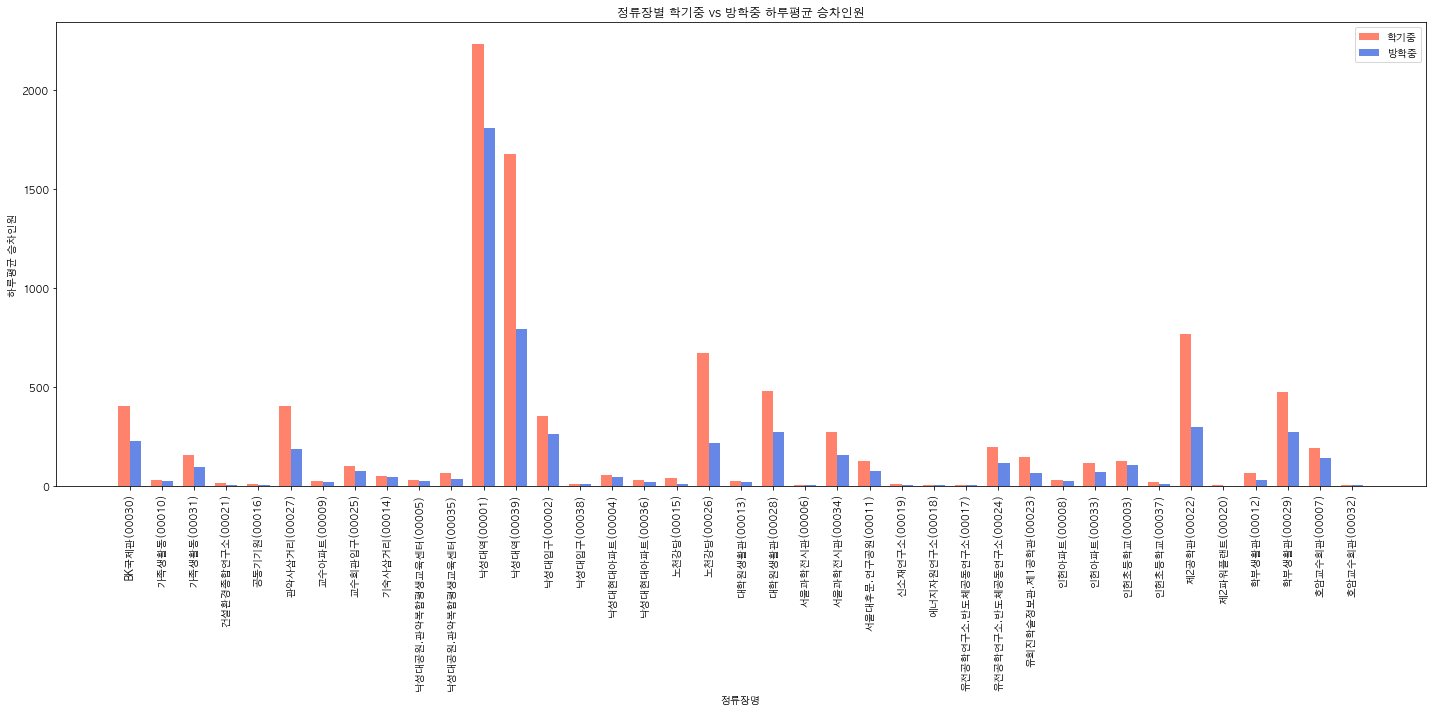

In [249]:
# 정류장명과 하루 평균 승차인원 추출
stations = merged_df['역명']
semester_geton = merged_df['하루평균_승차인원_semester']
vacation_geton = merged_df['하루평균_승차인원_vacation']

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 인덱스 설정
index = np.arange(len(stations))

# 학기중과 방학중의 하루 평균 승차인원을 막대 그래프로 표시
bar_width = 0.35
plt.bar(index, semester_geton, bar_width, label='학기중', color='tomato', alpha=0.8)
plt.bar(index + bar_width, vacation_geton, bar_width, label='방학중', color='royalblue', alpha=0.8)

# 라벨 및 타이틀 설정
plt.xlabel('정류장명')
plt.ylabel('하루평균 승차인원')
plt.title('정류장별 학기중 vs 방학중 하루평균 승차인원')
plt.xticks(index + bar_width / 2, stations, rotation=90)
plt.legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()

### 2) 하차인원

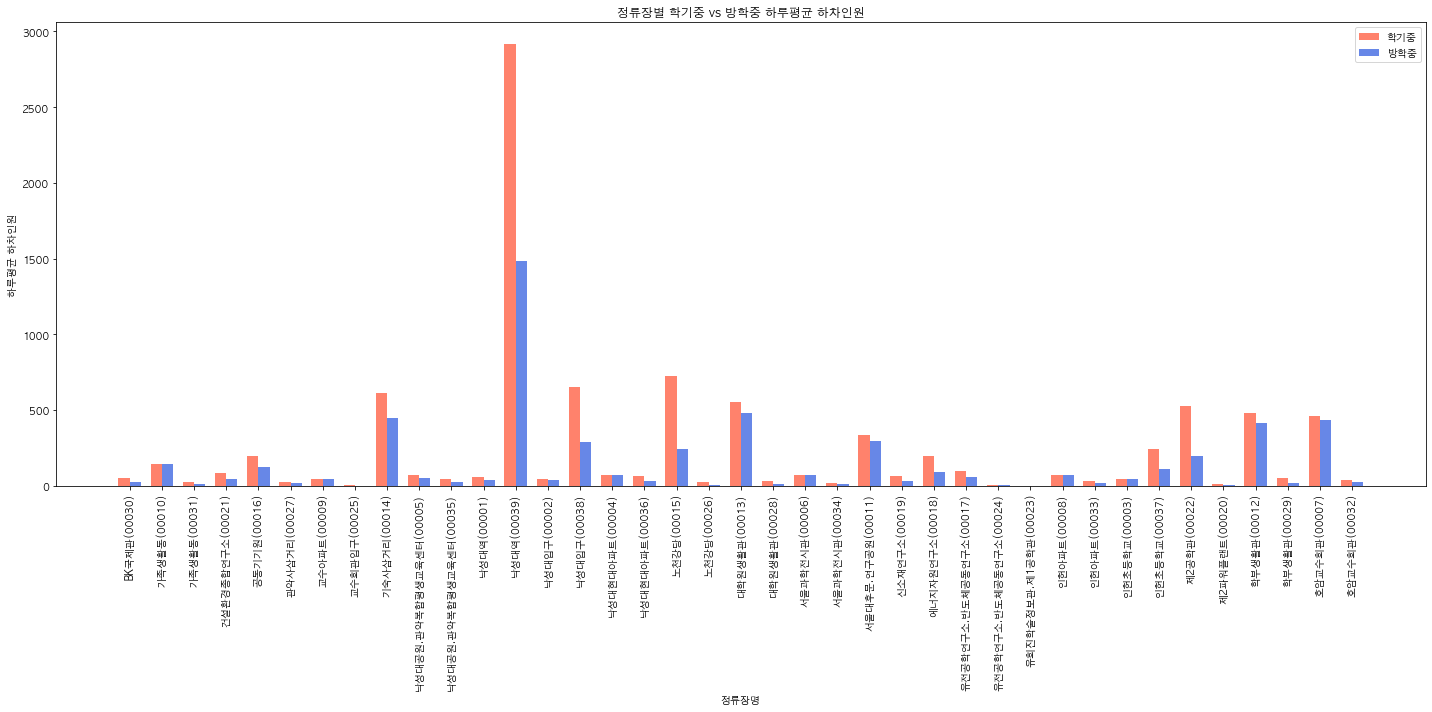

In [250]:
# 정류장명과 하루 평균 하차인원 추출
stations = merged_df['역명']
semester_getoff = merged_df['하루평균_하차인원_semester']
vacation_getoff = merged_df['하루평균_하차인원_vacation']

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 인덱스 설정
index = np.arange(len(stations))

# 학기중과 방학중의 하루 평균 하차인원을 막대 그래프로 표시
bar_width = 0.35
plt.bar(index, semester_getoff, bar_width, label='학기중', color='tomato', alpha=0.8)
plt.bar(index + bar_width, vacation_getoff, bar_width, label='방학중', color='royalblue', alpha=0.8)

# 라벨 및 타이틀 설정
plt.xlabel('정류장명')
plt.ylabel('하루평균 하차인원')
plt.title('정류장별 학기중 vs 방학중 하루평균 하차인원')
plt.xticks(index + bar_width / 2, stations, rotation=90)
plt.legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()

### 3) 승차+하차인원 합쳐서(유동인구) 하나의 그래프에 비교

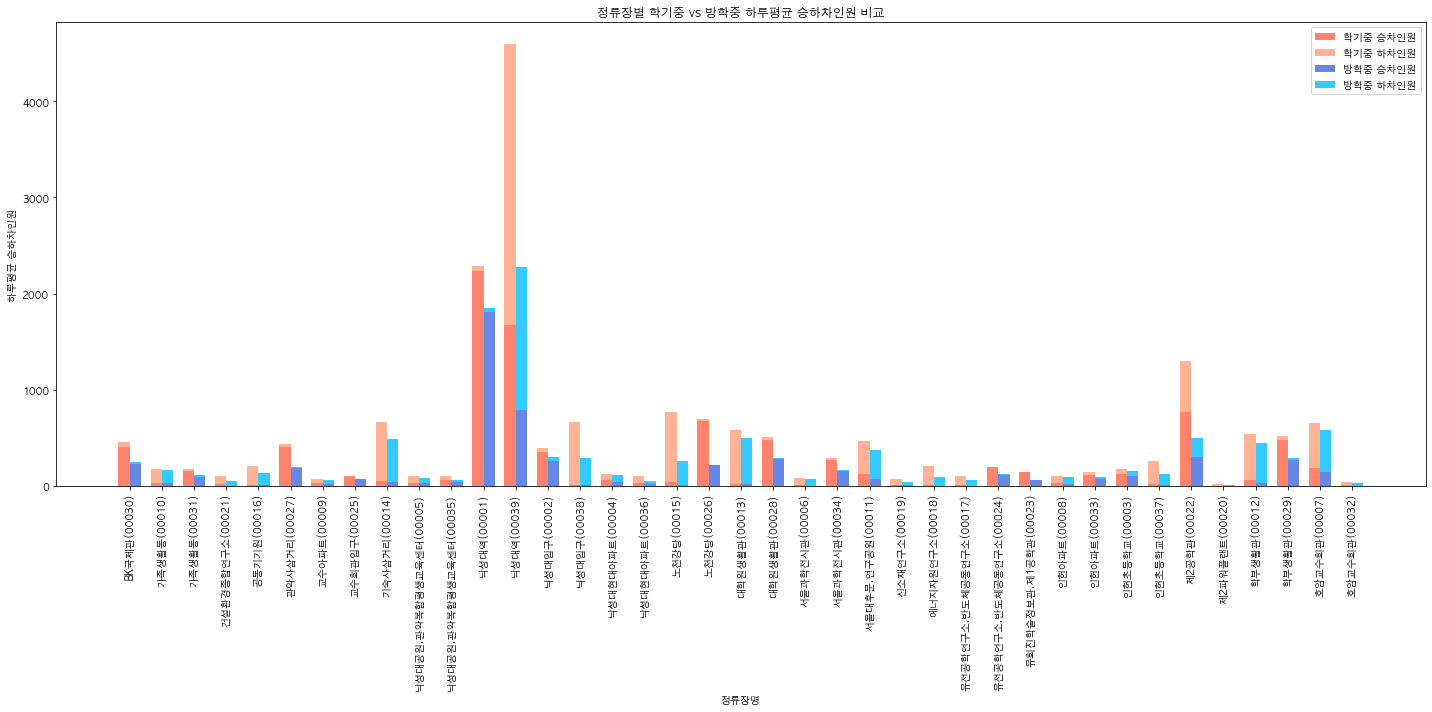

In [251]:
# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 인덱스 설정
index = np.arange(len(stations))
bar_width = 0.35

# 학기 중 승차인원과 하차인원 막대 그래프 표시 (파란색)
plt.bar(index, semester_geton, bar_width, label='학기중 승차인원', color='tomato', alpha=0.8)
plt.bar(index, semester_getoff, bar_width, bottom=semester_geton, label='학기중 하차인원', color='lightsalmon', alpha=0.8)

# 방학 중 승차인원과 하차인원 막대 그래프 표시 (분홍색)
plt.bar(index + bar_width, vacation_geton, bar_width, label='방학중 승차인원', color='royalblue', alpha=0.8)
plt.bar(index + bar_width, vacation_getoff, bar_width, bottom=vacation_geton, label='방학중 하차인원', color='deepskyblue', alpha=0.8)

# 라벨 및 타이틀 설정
plt.xlabel('정류장명')
plt.ylabel('하루평균 승하차인원')
plt.title('정류장별 학기중 vs 방학중 하루평균 승하차인원 비교')
plt.xticks(index + bar_width / 2, stations, rotation=90)
plt.legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()

cf) 학기중에 당연히 승하차인원이 더 많음. 
근데 호암교수회관은 방학 때도 딱히 차이가 없다..교수회관이라?

## (2) 주요 정류장 시간별 승하차인원

### 1) 낙성대역

In [174]:
# busstop1_2023_semester = station_avg_time_semester[station_avg_time_semester['역명'] == '낙성대역(00039)']

In [195]:
# busstop1_2023_semester

,역명,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
12,낙성대역(00039),0.475,0.175,23.295833,30.304167,69.141667,64.345833,208.854167,104.816667,207.758333,...,63.516667,184.954167,58.2625,145.75,69.154167,130.954167,76.033333,104.275,56.908333,63.0


In [219]:
# # 시간대
# hours = range(5, 24)

# # 승차인원과 하차인원 추출
# boarding = busstop1_2023_semester.filter(like='승차총승객수').values.flatten()
# alighting = busstop1_2023_semester.filter(like='하차총승객수').values.flatten()

# # 그래프 그리기
# fig, ax = plt.subplots(figsize=(12, 6))

# # 각 시간대별 승차인원과 하차인원 막대그래프 그리기
# width = 0.4  # 막대 너비 설정
# ax.bar(np.array(hours) - width/2, boarding, width=width, label='승차인원', alpha=0.7, color='skyblue')
# ax.bar(np.array(hours) + width/2, alighting, width=width, label='하차인원', alpha=0.7, color='salmon')

# # 그래프 제목과 축 레이블 설정
# ax.set_title('학기중 낙성대역 시간대별 하루 평균 승차인원과 하차인원')
# ax.set_xlabel('시간대')
# ax.set_ylabel('평균 인원')

# # x축 눈금 레이블 설정
# ax.set_xticks(hours)
# ax.set_xticklabels([str(hour) + '시' for hour in hours])

# # 범례 표시
# ax.legend()

# plt.show()

In [220]:
# busstop0_2023_semester = station_avg_time_semester[station_avg_time_semester['역명'] == '낙성대역(00001)']

In [221]:
# busstop0_2023_semester

In [222]:
# # 시간대
# hours = range(5, 24)

# # 승차인원과 하차인원 추출
# boarding = busstop0_2023_semester.filter(like='승차총승객수').values.flatten()
# alighting = busstop0_2023_semester.filter(like='하차총승객수').values.flatten()

# # 그래프 그리기
# fig, ax = plt.subplots(figsize=(12, 6))

# # 각 시간대별 승차인원과 하차인원 막대그래프 그리기
# width = 0.4  # 막대 너비 설정
# ax.bar(np.array(hours) - width/2, boarding, width=width, label='승차인원', alpha=0.7, color='skyblue')
# ax.bar(np.array(hours) + width/2, alighting, width=width, label='하차인원', alpha=0.7, color='salmon')

# # 그래프 제목과 축 레이블 설정
# ax.set_title('학기중 낙성대역 시간대별 하루 평균 승차인원과 하차인원')
# ax.set_xlabel('시간대')
# ax.set_ylabel('평균 인원')

# # x축 눈금 레이블 설정
# ax.set_xticks(hours)
# ax.set_xticklabels([str(hour) + '시' for hour in hours])

# # 범례 표시
# ax.legend()

# plt.show()

In [223]:
# busstop1_2023_vacation = station_avg_time_vacation[station_avg_time_vacation['역명'] == '낙성대역(00039)']

In [224]:
# busstop1_2023_vacation

In [225]:
# # 시간대
# hours = range(5, 24)

# # 승차인원과 하차인원 추출
# boarding = busstop1_2023_vacation.filter(like='승차총승객수').values.flatten()
# alighting = busstop1_2023_vacation.filter(like='하차총승객수').values.flatten()

# # 그래프 그리기
# fig, ax = plt.subplots(figsize=(12, 6))

# # 각 시간대별 승차인원과 하차인원 막대그래프 그리기
# width = 0.4  # 막대 너비 설정
# ax.bar(np.array(hours) - width/2, boarding, width=width, label='승차인원', alpha=0.7, color='skyblue')
# ax.bar(np.array(hours) + width/2, alighting, width=width, label='하차인원', alpha=0.7, color='salmon')

# # 그래프 제목과 축 레이블 설정
# ax.set_title('방학중 낙성대역 시간대별 하루 평균 승차인원과 하차인원')
# ax.set_xlabel('시간대')
# ax.set_ylabel('평균 인원')

# # x축 눈금 레이블 설정
# ax.set_xticks(hours)
# ax.set_xticklabels([str(hour) + '시' for hour in hours])

# # 범례 표시
# ax.legend()

# plt.show()

별로다..그냥 승차인원을 학기중과 방학중으로 한번에 보여주는 게 나을 듯

### 승차인원 학기중 vs 방학중

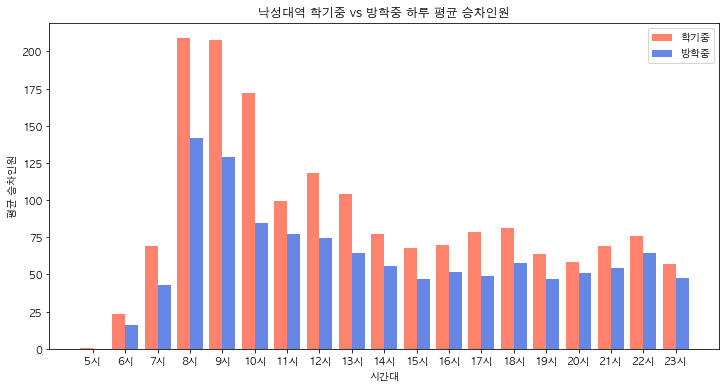

In [262]:
# 낙성대역(00039)의 데이터만 추출
nak_semester_data = station_avg_time_semester[station_avg_time_semester['역명'] == '낙성대역(00039)']
nak_vacation_data = station_avg_time_vacation[station_avg_time_vacation['역명'] == '낙성대역(00039)']


# 시간대
hours = range(5, 24)

# 학기중 승차인원과 방학중 승차인원 추출
nak_boarding_semester = nak_semester_data.filter(like='승차총승객수').values.flatten()
nak_boarding_vacation = nak_vacation_data.filter(like='승차총승객수').values.flatten()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 각 시간대별 학기중, 방학중 승차인원 막대그래프 그리기
width = 0.4  # 막대 너비 설정
ax.bar(np.array(hours) - width/2, nak_boarding_semester, width=width, label='학기중', alpha=0.8, color='tomato')
ax.bar(np.array(hours) + width/2, nak_boarding_vacation, width=width, label='방학중', alpha=0.8, color='royalblue')

# 그래프 제목과 축 레이블 설정
ax.set_title('낙성대역 학기중 vs 방학중 하루 평균 승차인원')
ax.set_xlabel('시간대')
ax.set_ylabel('평균 승차인원')

# x축 눈금 레이블 설정
ax.set_xticks(hours)
ax.set_xticklabels([str(hour) + '시' for hour in hours])

# 범례 표시
ax.legend()

plt.show()

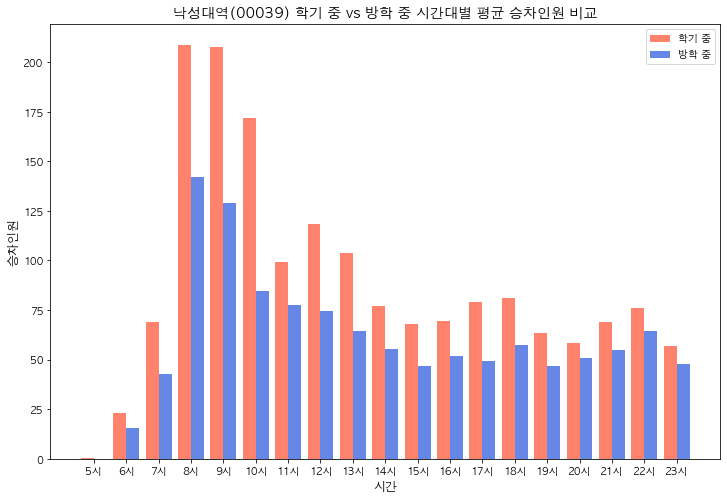

In [263]:
# 낙성대역(00039)의 데이터만 추출
nak_semester_data = station_avg_time_semester[station_avg_time_semester['역명'] == '낙성대역(00039)']
nak_vacation_data = station_avg_time_vacation[station_avg_time_vacation['역명'] == '낙성대역(00039)']

# 각 시간별 승차인원 추출
nak__boarding_semester = nak_semester_data.filter(like='승차총승객수').values.flatten()
nak__boarding_vacation = nak_vacation_data.filter(like='승차총승객수').values.flatten()

# 시간대 레이블 (5시부터 23시까지)
hours = np.arange(5, 24)

# 그래프 설정
plt.figure(figsize=(12, 8))

# 학기 중 승차인원 막대 그래프
plt.bar(hours - 0.2, nak_boarding_semester, width=0.4, alpha=0.8, label='학기 중', color='tomato')

# 방학 중 승차인원 막대 그래프
plt.bar(hours + 0.2, nak_boarding_vacation, width=0.4, alpha=0.8, label='방학 중', color='royalblue')

# 그래프 제목 및 레이블 설정
plt.xlabel('시간', fontsize=12)
plt.ylabel('승차인원', fontsize=12)
plt.title('낙성대역(00039) 학기 중 vs 방학 중 시간대별 평균 승차인원 비교', fontsize=14)
plt.xticks(hours, [f'{hour}시' for hour in hours])  # 시간대 레이블 설정 (5시부터 23시까지)
plt.legend()

# 그래프 표시
plt.show()

### 2) 호암교수회관

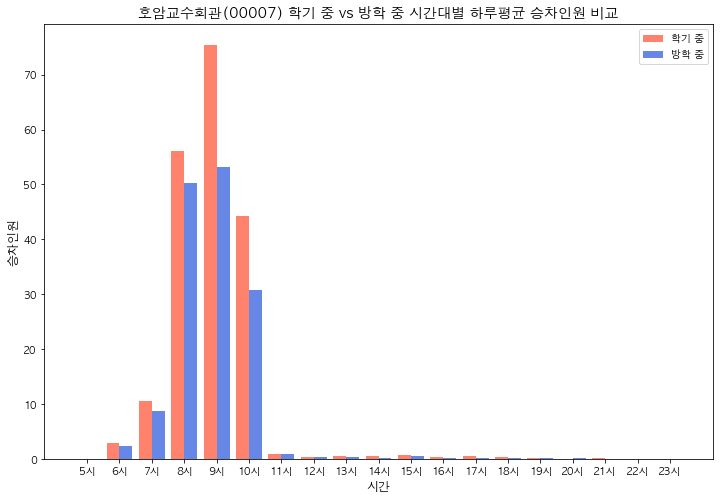

In [264]:
# 호암교수회관(00007)의 데이터만 추출
hoam07_semester_data = station_avg_time_semester[station_avg_time_semester['역명'] == '호암교수회관(00007)']
hoam07_vacation_data = station_avg_time_vacation[station_avg_time_vacation['역명'] == '호암교수회관(00007)']

# 각 시간별 승차인원 추출
hoam07_boarding_semester = hoam07_semester_data.filter(like='승차총승객수').values.flatten()
hoam07_boarding_vacation = hoam07_vacation_data.filter(like='승차총승객수').values.flatten()

# 시간대 레이블 (5시부터 23시까지)
hours = np.arange(5, 24)

# 그래프 설정
plt.figure(figsize=(12, 8))

# 학기 중 승차인원 막대 그래프
plt.bar(hours - 0.2, hoam07_boarding_semester, width=0.4, alpha=0.8, label='학기 중', color='tomato')

# 방학 중 승차인원 막대 그래프
plt.bar(hours + 0.2, hoam07_boarding_vacation, width=0.4, alpha=0.8, label='방학 중', color='royalblue')

# 그래프 제목 및 레이블 설정
plt.xlabel('시간', fontsize=12)
plt.ylabel('승차인원', fontsize=12)
plt.title('호암교수회관(00007) 학기 중 vs 방학 중 시간대별 하루평균 승차인원 비교', fontsize=14)
plt.xticks(hours, [f'{hour}시' for hour in hours])  # 시간대 레이블 설정 (5시부터 23시까지)
plt.legend()

# 그래프 표시
plt.show()

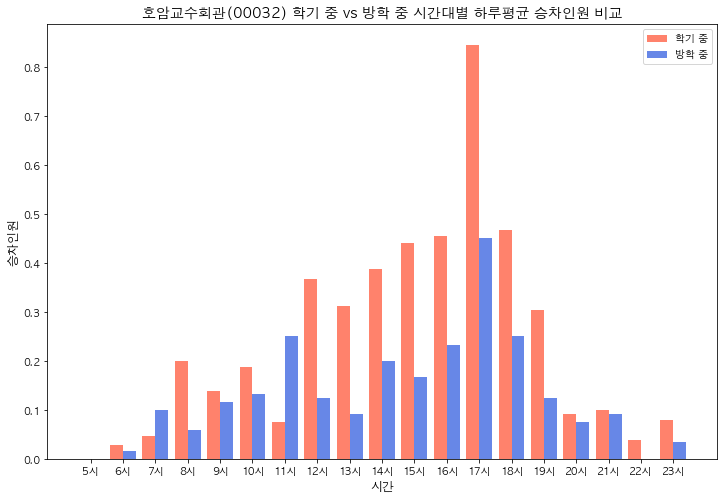

In [265]:
# 호암교수회관(00032)의 데이터만 추출
hoam32_semester_data = station_avg_time_semester[station_avg_time_semester['역명'] == '호암교수회관(00032)']
hoam32_vacation_data = station_avg_time_vacation[station_avg_time_vacation['역명'] == '호암교수회관(00032)']

# 각 시간별 승차인원 추출
hoam32_boarding_semester = hoam32_semester_data.filter(like='승차총승객수').values.flatten()
hoam32_boarding_vacation = hoam32_vacation_data.filter(like='승차총승객수').values.flatten()

# 시간대 레이블 (5시부터 23시까지)
hours = np.arange(5, 24)

# 그래프 설정
plt.figure(figsize=(12, 8))

# 학기 중 승차인원 막대 그래프
plt.bar(hours - 0.2, hoam32_boarding_semester, width=0.4, alpha=0.8, label='학기 중', color='tomato')

# 방학 중 승차인원 막대 그래프
plt.bar(hours + 0.2, hoam32_boarding_vacation, width=0.4, alpha=0.8, label='방학 중', color='royalblue')

# 그래프 제목 및 레이블 설정
plt.xlabel('시간', fontsize=12)
plt.ylabel('승차인원', fontsize=12)
plt.title('호암교수회관(00032) 학기 중 vs 방학 중 시간대별 하루평균 승차인원 비교', fontsize=14)
plt.xticks(hours, [f'{hour}시' for hour in hours])  # 시간대 레이블 설정 (5시부터 23시까지)
plt.legend()

# 그래프 표시
plt.show()

cf) 전자가 우리가 궁금한 정류장 맞지?

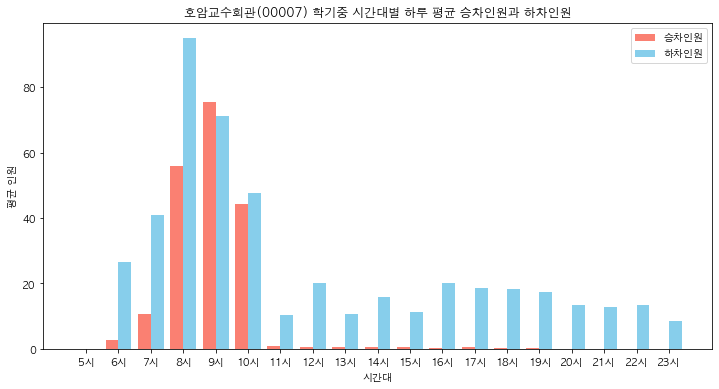

In [277]:
hoam07_semester_data = station_avg_time_semester[station_avg_time_semester['역명'] == '호암교수회관(00007)']

# 시간대
hours = range(5, 24)

# 승차인원과 하차인원 추출
boarding = hoam07_semester_data.filter(like='승차총승객수').values.flatten()
alighting = hoam07_semester_data.filter(like='하차총승객수').values.flatten()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 각 시간대별 승차인원과 하차인원 막대그래프 그리기
width = 0.4  # 막대 너비 설정
ax.bar(np.array(hours) - width/2, boarding, width=width, label='승차인원', color='salmon')
ax.bar(np.array(hours) + width/2, alighting, width=width, label='하차인원', color='skyblue')

# 그래프 제목과 축 레이블 설정
ax.set_title('호암교수회관(00007) 학기중 시간대별 하루 평균 승차인원과 하차인원')
ax.set_xlabel('시간대')
ax.set_ylabel('평균 인원')

# x축 눈금 레이블 설정
ax.set_xticks(hours)
ax.set_xticklabels([str(hour) + '시' for hour in hours])

# 범례 표시
ax.legend()

plt.show()

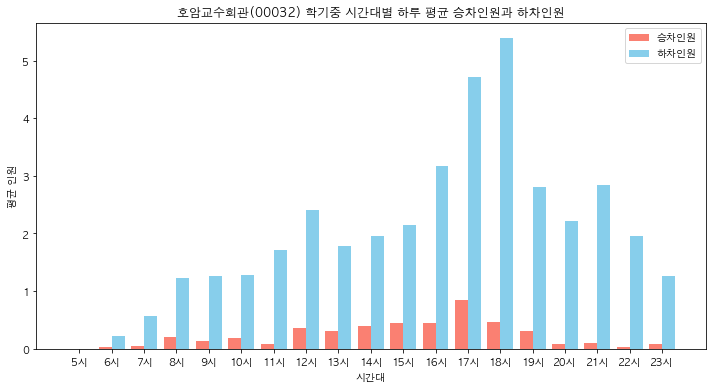

In [274]:
hoam32_semester_data = station_avg_time_semester[station_avg_time_semester['역명'] == '호암교수회관(00032)']

# 시간대
hours = range(5, 24)

# 승차인원과 하차인원 추출
boarding = hoam32_semester_data.filter(like='승차총승객수').values.flatten()
alighting = hoam32_semester_data.filter(like='하차총승객수').values.flatten()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 각 시간대별 승차인원과 하차인원 막대그래프 그리기
width = 0.4  # 막대 너비 설정
ax.bar(np.array(hours) - width/2, boarding, width=width, label='승차인원', color='salmon')
ax.bar(np.array(hours) + width/2, alighting, width=width, label='하차인원', color='skyblue')

# 그래프 제목과 축 레이블 설정
ax.set_title('호암교수회관(00032) 학기중 시간대별 하루 평균 승차인원과 하차인원')
ax.set_xlabel('시간대')
ax.set_ylabel('평균 인원')

# x축 눈금 레이블 설정
ax.set_xticks(hours)
ax.set_xticklabels([str(hour) + '시' for hour in hours])

# 범례 표시
ax.legend()

plt.show()

### 3) 가족생활동

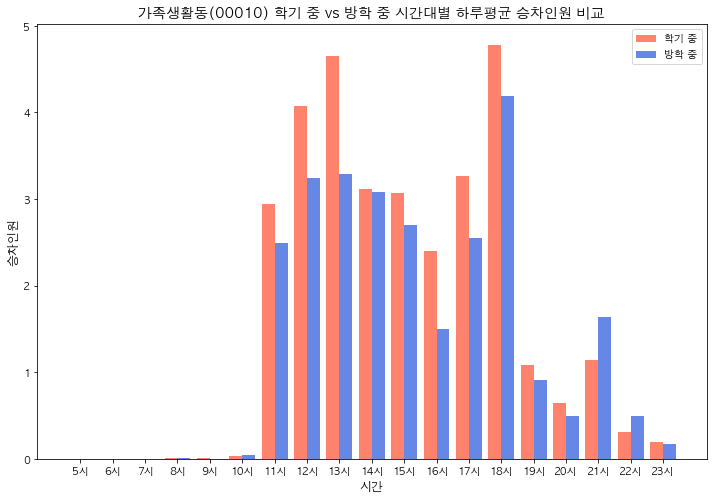

In [268]:
# 가족생활동(00010)의 데이터만 추출
family10_semester_data = station_avg_time_semester[station_avg_time_semester['역명'] == '가족생활동(00010)']
family10_vacation_data = station_avg_time_vacation[station_avg_time_vacation['역명'] == '가족생활동(00010)']

# 각 시간별 승차인원 추출
family10_boarding_semester = family10_semester_data.filter(like='승차총승객수').values.flatten()
family10_boarding_vacation = family10_vacation_data.filter(like='승차총승객수').values.flatten()

# 시간대 레이블 (5시부터 23시까지)
hours = np.arange(5, 24)

# 그래프 설정
plt.figure(figsize=(12, 8))

# 학기 중 승차인원 막대 그래프
plt.bar(hours - 0.2, family10_boarding_semester, width=0.4, alpha=0.8, label='학기 중', color='tomato')

# 방학 중 승차인원 막대 그래프
plt.bar(hours + 0.2, family10_boarding_vacation, width=0.4, alpha=0.8, label='방학 중', color='royalblue')

# 그래프 제목 및 레이블 설정
plt.xlabel('시간', fontsize=12)
plt.ylabel('승차인원', fontsize=12)
plt.title('가족생활동(00010) 학기 중 vs 방학 중 시간대별 하루평균 승차인원 비교', fontsize=14)
plt.xticks(hours, [f'{hour}시' for hour in hours])  # 시간대 레이블 설정 (5시부터 23시까지)
plt.legend()

# 그래프 표시
plt.show()

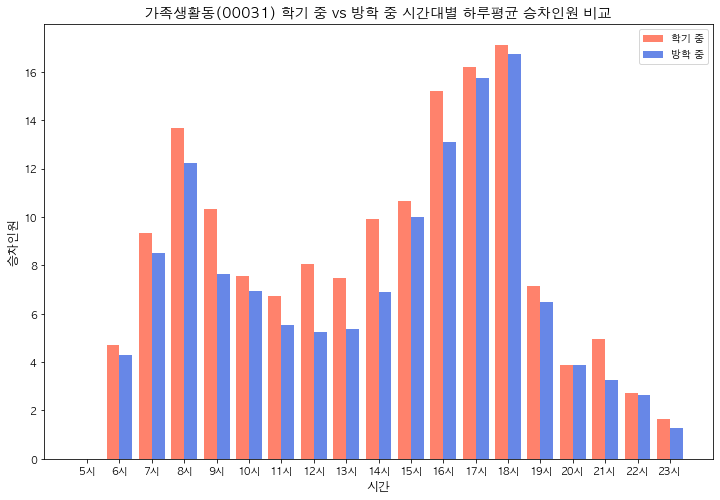

In [269]:
# 가족생활동(00031)의 데이터만 추출
family31_semester_data = station_avg_time_semester[station_avg_time_semester['역명'] == '가족생활동(00031)']
family31_vacation_data = station_avg_time_vacation[station_avg_time_vacation['역명'] == '가족생활동(00031)']

# 각 시간별 승차인원 추출
family31_boarding_semester = family31_semester_data.filter(like='승차총승객수').values.flatten()
family31_boarding_vacation = family31_vacation_data.filter(like='승차총승객수').values.flatten()

# 시간대 레이블 (5시부터 23시까지)
hours = np.arange(5, 24)

# 그래프 설정
plt.figure(figsize=(12, 8))

# 학기 중 승차인원 막대 그래프
plt.bar(hours - 0.2, family31_boarding_semester, width=0.4, alpha=0.8, label='학기 중', color='tomato')

# 방학 중 승차인원 막대 그래프
plt.bar(hours + 0.2, family31_boarding_vacation, width=0.4, alpha=0.8, label='방학 중', color='royalblue')

# 그래프 제목 및 레이블 설정
plt.xlabel('시간', fontsize=12)
plt.ylabel('승차인원', fontsize=12)
plt.title('가족생활동(00031) 학기 중 vs 방학 중 시간대별 하루평균 승차인원 비교', fontsize=14)
plt.xticks(hours, [f'{hour}시' for hour in hours])  # 시간대 레이블 설정 (5시부터 23시까지)
plt.legend()

# 그래프 표시
family10_semester_data = station_avg_time_semester[station_avg_time_semester['역명'] == '가족생활동(00010)']plt.show()

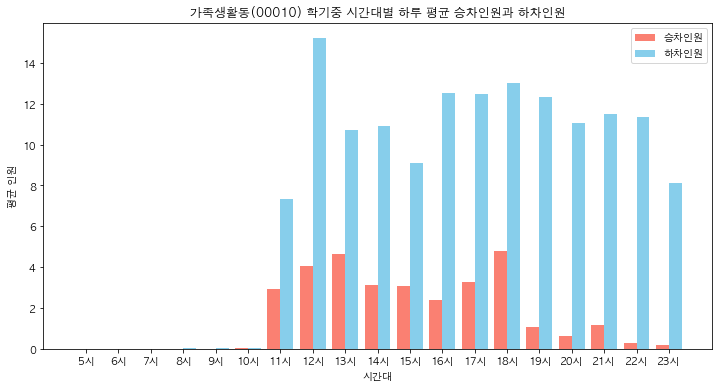

In [275]:
family10_semester_data = station_avg_time_semester[station_avg_time_semester['역명'] == '가족생활동(00010)']

# 시간대
hours = range(5, 24)

# 승차인원과 하차인원 추출
boarding = family10_semester_data.filter(like='승차총승객수').values.flatten()
alighting = family10_semester_data.filter(like='하차총승객수').values.flatten()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 각 시간대별 승차인원과 하차인원 막대그래프 그리기
width = 0.4  # 막대 너비 설정
ax.bar(np.array(hours) - width/2, boarding, width=width, label='승차인원', color='salmon')
ax.bar(np.array(hours) + width/2, alighting, width=width, label='하차인원', color='skyblue')

# 그래프 제목과 축 레이블 설정
ax.set_title('가족생활동(00010) 학기중 시간대별 하루 평균 승차인원과 하차인원')
ax.set_xlabel('시간대')
ax.set_ylabel('평균 인원')

# x축 눈금 레이블 설정
ax.set_xticks(hours)
ax.set_xticklabels([str(hour) + '시' for hour in hours])

# 범례 표시
ax.legend()

plt.show()

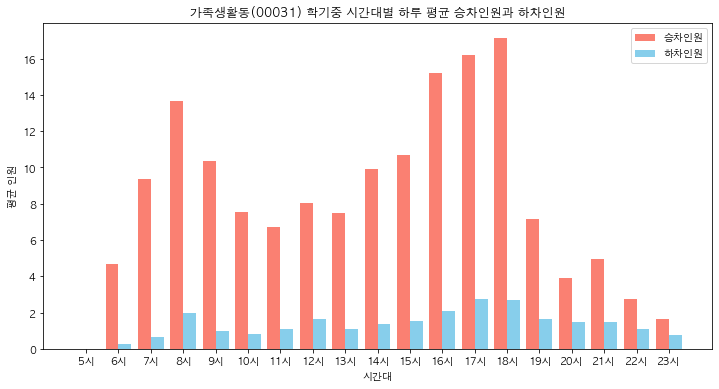

In [276]:
family31_semester_data = station_avg_time_semester[station_avg_time_semester['역명'] == '가족생활동(00031)']

# 시간대
hours = range(5, 24)

# 승차인원과 하차인원 추출
boarding = family31_semester_data.filter(like='승차총승객수').values.flatten()
alighting = family31_semester_data.filter(like='하차총승객수').values.flatten()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 각 시간대별 승차인원과 하차인원 막대그래프 그리기
width = 0.4  # 막대 너비 설정
ax.bar(np.array(hours) - width/2, boarding, width=width, label='승차인원', color='salmon')
ax.bar(np.array(hours) + width/2, alighting, width=width, label='하차인원', color='skyblue')

# 그래프 제목과 축 레이블 설정
ax.set_title('가족생활동(00031) 학기중 시간대별 하루 평균 승차인원과 하차인원')
ax.set_xlabel('시간대')
ax.set_ylabel('평균 인원')

# x축 눈금 레이블 설정
ax.set_xticks(hours)
ax.set_xticklabels([str(hour) + '시' for hour in hours])

# 범례 표시
ax.legend()

plt.show()